In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Load Data to 1 DataFrame

In [45]:
years = ["2015", "2016", "2017", "2018"]
months = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

df_years = []
for year in years:
    df_months = []
    for month in months:
        if (year == "2018") and (month > "04"):
            filename = "data/%s%s-bluebikes-tripdata.csv" % (year, month)
        else:
            filename = "data/%s%s-hubway-tripdata.csv" % (year, month)
        df_month = pd.read_csv(filename)
        df_months.append(df_month)
    df_year = pd.concat(df_months, keys=months)
    df_years.append(df_year)
df = pd.concat(df_years, keys=years)    


In [72]:
stations1 = pd.read_csv("data/Hubway_Stations_2011_2016.csv")
stations2 = pd.read_csv("data/Hubway_Stations_as_of_July_2017.csv")

### Some basic info

In [71]:
print("Attributes")
print(df.columns.tolist())
print("Number of Stations: %d" % df['end station id'].unique().shape[0])
print("Number of Bikes %d" % df['bikeid'].unique().shape[0])

Attributes
['tripduration', 'starttime', 'stoptime', 'start station id', 'start station name', 'start station latitude', 'start station longitude', 'end station id', 'end station name', 'end station latitude', 'end station longitude', 'bikeid', 'usertype', 'birth year', 'gender']
Number of Stations: 355
Number of Bikes 4314


### # Bike use Trend

In [84]:
counts = []
for year in years:
    for month in months:
        counts.append(df.loc[year, month].shape[0])

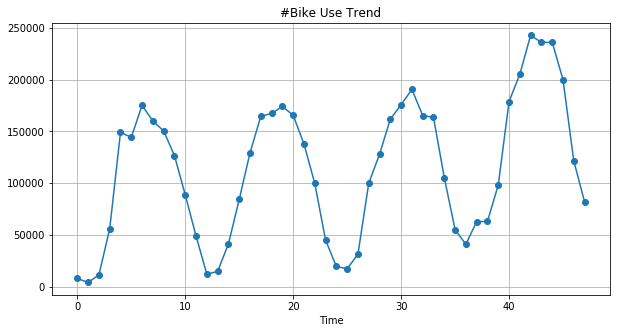

In [94]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title("#Bike Use Trend")
ax.set_xlabel("Time")
ax.plot(counts, "-o")
ax.grid()

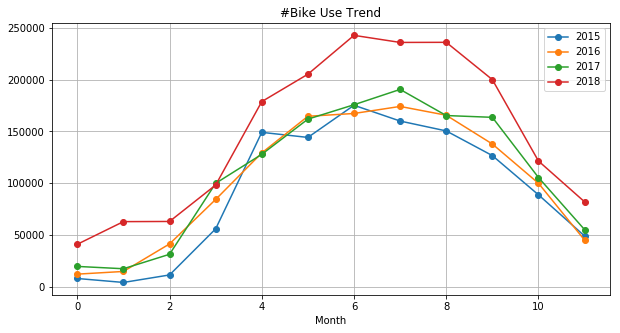

In [95]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title("#Bike Use Trend")
ax.set_xlabel("Month")
ax.plot(counts[:12], "-o", label="2015")
ax.plot(counts[12:24], "-o", label="2016")
ax.plot(counts[24:36], "-o", label="2017")
ax.plot(counts[36:], "-o", label="2018")
ax.legend()
ax.grid()

### Most Used Bikes

In [107]:
counts = df.groupby(['bikeid']).count().values[:,0]
counts = np.sort(counts)
numBike = counts.shape[0]

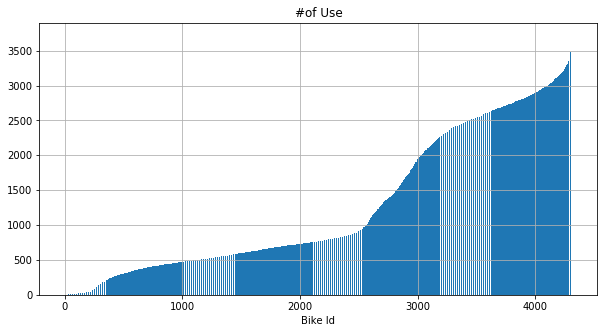

In [109]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()
ax.set_title("#of Use")
ax.set_xlabel("Bike Id")
ax.bar(np.arange(numBike), counts)
ax.grid()

### Gender 

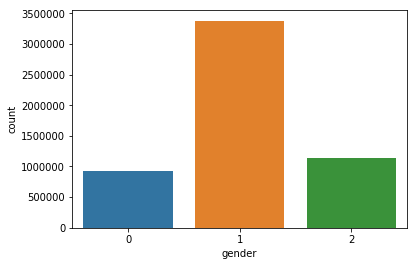

In [112]:
sns.countplot(x="gender", data=df)

### Station Positions

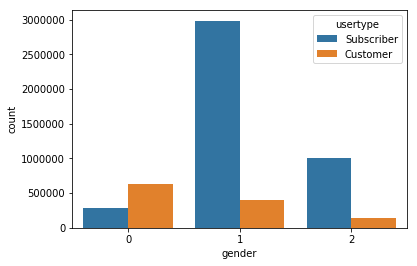

In [115]:
sns.countplot(x="gender", hue="usertype", data=df)